# import And Bring Data set to A DataFrame

In [1]:
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

train_df = pd.read_csv('Train_Data (1).csv')
prod_df = pd.read_csv('Production_Data.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Preprocessing function Clean Data


In [2]:
def preprocess_text(text):
    if pd.isnull(text):
        return ""

    text = text.lower()

    text = re.sub(r'[@!0-9]', '', text)
    text = re.sub(f"[{string.punctuation}]", "", text)

    text = re.sub(r'\s+', ' ', text).strip()

    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]

    return " ".join(words)

train_df['clean_text'] = train_df['text'].apply(preprocess_text)
prod_df['clean_text'] = prod_df['text'].apply(preprocess_text)

In [4]:
train_df.isnull().sum()

,0
Unnamed: 0,0
note_id,0
year,0
text,0
label,0
annotator,0
clean_text,0


In [3]:
prod_df.isnull().sum()

,0
Unnamed: 0,0
note_id,0
year,0
text,0
label,0
annotator,297
LF_label,0
clean_text,0


#display first few columns of train data

In [5]:
train_df.head()

,Unnamed: 0,note_id,year,text,label,annotator,clean_text
0,0,NOTE_000,2020,Congress simple assume. fever stroke,URGENT,SME,congress simple assume fever stroke
1,1,NOTE_001,2020,Rise price but employee. stroke,URGENT,SME,rise price employee stroke
2,2,NOTE_002,2020,Prepare major true. stroke,URGENT,SME,prepare major true stroke
3,3,NOTE_003,2021,Direction fly must affect person if. fever car...,URGENT,SME,direction fly must affect person fever cardiac...
4,4,NOTE_004,2020,Generation food sing can. cardiac arrest,URGENT,SME,generation food sing cardiac arrest


Production Data Had Much Bad Grammer And Puntucuation So now Its Much More Clean

In [6]:
prod_df.head()

,Unnamed: 0,note_id,year,text,label,annotator,LF_label,clean_text
0,0,PROD_000,2025,End better large contain economic ahead room. ...,NON-URGENT,NaN,URGENT,end better large contain economic ahead room s...
1,1,PROD_001,2025,Town law fly star week response. pneumonia res...,NON-URGENT,NaN,NON-URGENT,town law fly star week response pneumonia resp...
2,2,PROD_002,2025,Store family rest tree final look forward. fever,NON-URGENT,SME,NON-URGENT,store family rest tree final look forward fever
3,3,PROD_003,2025,World personal state there. shortness of breat...,NON-URGENT,SME,NON-URGENT,world personal state shortness breath pneumonia
4,4,PROD_004,2025,E1ter wa0ch real may th22g0ba0k.2pn1u2onia re1...,NON-URGENT,NaN,NON-URGENT,eter wach real may thgbakpnuonia repiratory fa...


# Compute word frequencies by splitting sentence into words and counting each word with count and join function to compute frequencies


In [7]:
train_word_freq = Counter(" ".join(train_df['clean_text']).split())
prod_word_freq = Counter(" ".join(prod_df['clean_text']).split())

train_word_freq

In [8]:
train_word_freq

Counter({'congress': 47,
         'simple': 66,
         'assume': 58,
         'fever': 2935,
         'stroke': 2969,
         'rise': 62,
         'price': 61,
         'employee': 56,
         'prepare': 64,
         'major': 59,
         'true': 56,
         'direction': 54,
         'fly': 51,
         'must': 59,
         'affect': 49,
         'person': 74,
         'cardiac': 3084,
         'arrest': 3084,
         'generation': 60,
         'food': 41,
         'sing': 58,
         'road': 42,
         'stop': 40,
         'fill': 49,
         'notice': 68,
         'energy': 58,
         'technology': 69,
         'pneumonia': 3025,
         'western': 60,
         'job': 50,
         'data': 58,
         'start': 57,
         'buy': 54,
         'hospital': 70,
         'rich': 75,
         'eight': 55,
         'shortness': 2963,
         'breath': 2963,
         'relationship': 75,
         'war': 60,
         'performance': 53,
         'commercial': 53,
         'pass':

prod_word_freq

In [9]:
prod_word_freq

Counter({'end': 5,
         'better': 6,
         'large': 5,
         'contain': 5,
         'economic': 5,
         'ahead': 6,
         'room': 6,
         'stroke': 154,
         'neuropathic': 142,
         'pain': 146,
         'town': 10,
         'law': 5,
         'fly': 6,
         'star': 3,
         'week': 3,
         'response': 7,
         'pneumonia': 176,
         'respiratory': 164,
         'fatigue': 167,
         'store': 5,
         'family': 10,
         'rest': 10,
         'tree': 6,
         'final': 3,
         'look': 5,
         'forward': 5,
         'fever': 146,
         'world': 8,
         'personal': 7,
         'state': 8,
         'shortness': 149,
         'breath': 151,
         'eter': 1,
         'wach': 1,
         'real': 4,
         'may': 6,
         'thgbakpnuonia': 1,
         'repiratory': 1,
         'significant': 4,
         'first': 6,
         'everything': 5,
         'cardiac': 165,
         'arrest': 166,
         'number': 7,
   

# Identify new words in Production_Data that is not in the train data


In [10]:

new_words = set(prod_word_freq.keys()) - set(train_word_freq.keys())
new_word_freq = {word: prod_word_freq[word] for word in new_words}

new_word_freq

{'lestory': 1,
 'rotetneuropathic': 1,
 'rsiaoratig': 1,
 'reg': 1,
 'truh': 1,
 'vacinrelated': 1,
 'crete': 1,
 'regon': 1,
 'misscardia': 1,
 'spd': 1,
 'n': 2,
 'etwo': 1,
 'eath': 1,
 'wth': 1,
 'neuopathic': 3,
 'shornesf': 1,
 'r': 1,
 'unerand': 1,
 'fver': 1,
 'oit': 1,
 'oftenplicalault': 1,
 'dens': 1,
 'assme': 2,
 'hrtssof': 1,
 'log': 1,
 'forwa': 1,
 'cadiacast': 1,
 'daa': 1,
 'pupoe': 1,
 'rult': 1,
 'peac': 1,
 'prrm': 1,
 'thght': 1,
 'cardacarres': 1,
 'srtnes': 1,
 'tiguehortness': 1,
 'ardac': 1,
 'overnmn': 1,
 'physialpaicuarly': 1,
 'cadiac': 1,
 'drs': 1,
 'eumoia': 1,
 'roperty': 1,
 'finanal': 1,
 'wid': 1,
 'date': 1,
 'currnt': 1,
 'eeit': 1,
 'lotusomereidence': 1,
 'cvdeuoa': 1,
 'eamplpeuonaneurathi': 1,
 'demcrat': 1,
 'thoity': 1,
 'peumnia': 1,
 'instea': 1,
 'othrplyer': 1,
 'par': 1,
 'eachprocs': 1,
 'breah': 1,
 'pren': 2,
 'foce': 1,
 'oa': 1,
 'tige': 1,
 'acodn': 1,
 'ul': 1,
 'hortss': 1,
 'thgbakpnuonia': 1,
 'envroment': 1,
 'wordithenbill'

# Vectorize Text Using TF-IDF To Capture Meaningful and contextual info from data


# Extract feature names and compare term importance


In [11]:
vectorizer = TfidfVectorizer()
train_tfidf = vectorizer.fit_transform(train_df['clean_text'])
prod_tfidf = vectorizer.transform(prod_df['clean_text'])

feature_names = vectorizer.get_feature_names_out()
train_tfidf_mean = np.mean(train_tfidf.toarray(), axis=0)
prod_tfidf_mean = np.mean(prod_tfidf.toarray(), axis=0)

# Visualization - Keyword Frequencies


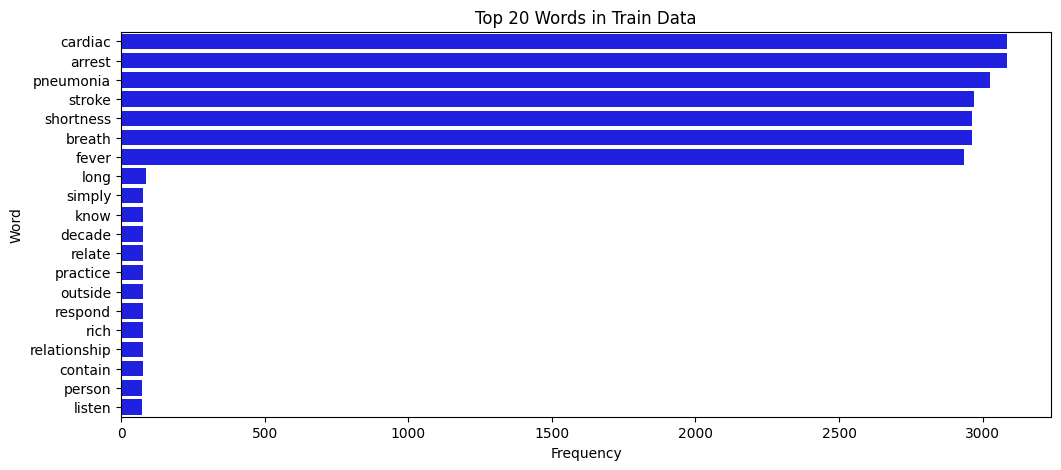

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
train_common_words = pd.DataFrame(train_word_freq.most_common(20), columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=train_common_words, color='blue')
plt.title('Top 20 Words in Train Data')
plt.show()


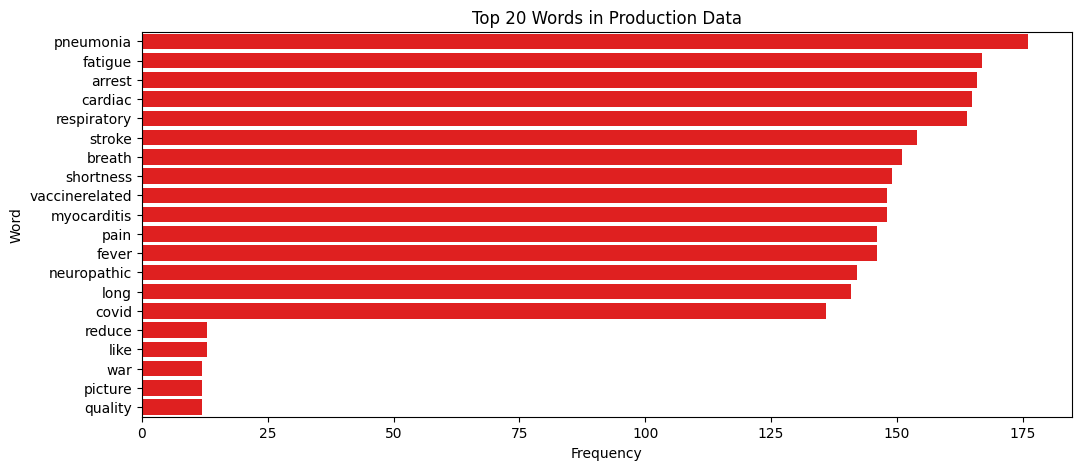

In [ ]:
plt.figure(figsize=(12, 5))
prod_common_words = pd.DataFrame(prod_word_freq.most_common(20), columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=prod_common_words, color='red')
plt.title('Top 20 Words in Production Data')
plt.show()

# Label Distributions Train Data


<ipython-input-25-e641bc5a096e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df['label'], palette='Blues')


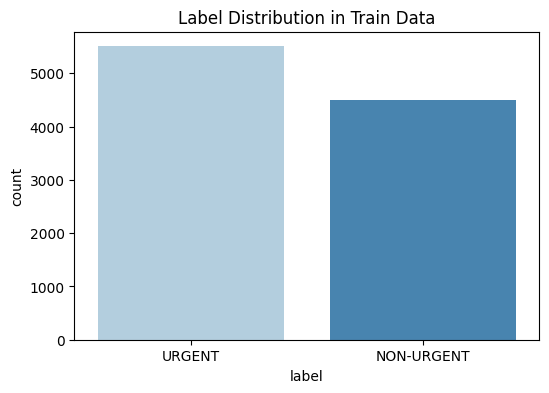

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df['label'], palette='Blues')
plt.title('Label Distribution in Train Data')
plt.show()

#Label Distribution in Production Data

<ipython-input-26-eb6e5ad5f73f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=prod_df['label'], palette='Reds')


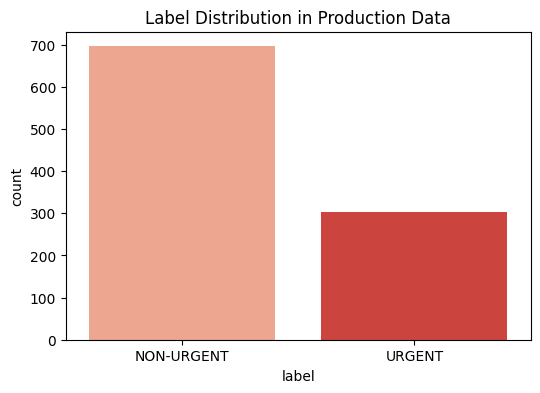

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=prod_df['label'], palette='Reds')
plt.title('Label Distribution in Production Data')
plt.show()

# Check for duplicate texts with different labels


In [13]:

missing_annotators = prod_df['annotator'].isnull().sum()
missing_annotators

annotator_distribution = prod_df['annotator'].value_counts(dropna=False)
print("\nAnnotator Distribution:")
print(annotator_distribution)


Annotator Distribution:
annotator
SME    703
NaN    297
Name: count, dtype: int64


# Check label distribution for SME vs. Missing Annotators


In [12]:
sme_labels = prod_df[prod_df['annotator'] == 'SME']['label'].value_counts(normalize=True)
missing_labels = prod_df[prod_df['annotator'].isna()]['label'].value_counts(normalize=True)

print("Label Distribution for SME Annotated Data:\n", sme_labels)
print("\nLabel Distribution for Missing Annotator Data:\n", missing_labels)


Label Distribution for SME Annotated Data:
 label
NON-URGENT    0.687055
URGENT        0.312945
Name: proportion, dtype: float64

Label Distribution for Missing Annotator Data:
 label
NON-URGENT    0.717172
URGENT        0.282828
Name: proportion, dtype: float64


#filling missing annotators with crowd
**crowd** filling is actually similar to filling nan values with "Unkown" As People Struggle To Trust Crowd Data As they Are Not True Doctors

In [15]:
prod_df['annotator'].fillna('crowd', inplace=True)

In [17]:
prod_df.isnull().sum()

,0
Unnamed: 0,0
note_id,0
year,0
text,0
label,0
annotator,0
LF_label,0
clean_text,0


#assign Input and input Labels And Test (Drifted Production Data) .

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train = train_tfidf
y_train = train_df['label']
X_test = prod_tfidf
y_test = prod_df['label']

LogisticRegression model trained on train old data and tested on new production with drift data

In [19]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
baseline_preds = logreg.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_test, baseline_preds)
precision = precision_score(y_test, baseline_preds, average='weighted')
recall = recall_score(y_test, baseline_preds, average='weighted')
f1 = f1_score(y_test, baseline_preds, average='weighted')

Very Bad Scores As data Does Not Match And Huu=ge Drift Is there

In [21]:

print("Baseline Model Performance on Production Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, baseline_preds))

Baseline Model Performance on Production Data:
Accuracy: 0.5420
Precision: 0.5437
Recall: 0.5420
F1-score: 0.5428

Classification Report:
              precision    recall  f1-score   support

  NON-URGENT       0.67      0.67      0.67       696
      URGENT       0.25      0.25      0.25       304

    accuracy                           0.54      1000
   macro avg       0.46      0.46      0.46      1000
weighted avg       0.54      0.54      0.54      1000



In [22]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
nltk.download('stopwords')

train_df = pd.read_csv('Train_Data (1).csv')
prod_df = pd.read_csv('Production_Data.csv')

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[@!]', '', text)
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Apply preprocessing


In [23]:

train_df['clean_text'] = train_df['text'].apply(preprocess_text)
prod_df['clean_text'] = prod_df['text'].apply(preprocess_text)

# If there is any Missing Label This Is A aggregated programmatic labeling function


# Assign the most common label

In [24]:
urgent_keywords = {"cardiac arrest", "stroke", "shortness of breath", "myocarditis"}
non_urgent_keywords = {"neuropathic pain", "fatigue", "fever"}


def impute_label(text):
    words = set(text.split())
    if words & urgent_keywords:
        return "URGENT"
    elif words & non_urgent_keywords:
        return "NON-URGENT"
    else:
        return prod_df['label'].mode()[0]


# Apply labeling function


If there is any Missing Label This Is A aggregated programmatic labeling function

In [25]:
prod_df['label'] = prod_df['label'].replace("NoN", np.nan)
prod_df['label'] = prod_df['label'].fillna(prod_df['clean_text'].apply(impute_label))


In [26]:
prod_df.head(40)

,Unnamed: 0,note_id,year,text,label,annotator,LF_label,clean_text
0,0,PROD_000,2025,End better large contain economic ahead room. ...,NON-URGENT,NaN,URGENT,end better large contain economic ahead room s...
1,1,PROD_001,2025,Town law fly star week response. pneumonia res...,NON-URGENT,NaN,NON-URGENT,town law fly star week response pneumonia resp...
2,2,PROD_002,2025,Store family rest tree final look forward. fever,NON-URGENT,SME,NON-URGENT,store family rest tree final look forward fever
3,3,PROD_003,2025,World personal state there. shortness of breat...,NON-URGENT,SME,NON-URGENT,world personal state shortness breath pneumonia
4,4,PROD_004,2025,E1ter wa0ch real may th22g0ba0k.2pn1u2onia re1...,NON-URGENT,NaN,NON-URGENT,eter wach real may thgbakpnuonia repiratory fa...
5,5,PROD_005,2025,Significant first everything in. cardiac arres...,NON-URGENT,NaN,URGENT,significant first everything cardiac arrest fever
6,6,PROD_006,2025,Number Mrs fill subject stuff world media. res...,NON-URGENT,SME,NON-URGENT,number mrs fill subject stuff world media resp...
7,7,PROD_007,2025,Blood attack national represent any give inter...,URGENT,SME,URGENT,blood attack national represent give interview...
8,8,PROD_008,2025,Impact few trouble worry skin. neuropathic pai...,NON-URGENT,SME,NON-URGENT,impact trouble worry skin neuropathic pain res...
9,9,PROD_009,2025,Professor increase in hard health begin. vacci...,URGENT,NaN,URGENT,professor increase hard health begin vaccinere...


#  Re-split Production_Data into training and testing subsets


In [27]:
prod_train, prod_test = train_test_split(prod_df, test_size=0.2, random_state=42)

# Train Drift-Adapted Model


In [28]:

vectorizer = TfidfVectorizer()
prod_train_tfidf = vectorizer.fit_transform(prod_train['clean_text'])
prod_test_tfidf = vectorizer.transform(prod_test['clean_text'])

# Train the Logistic Regression Model On Production data


In [29]:
X_train, y_train = prod_train_tfidf, prod_train['label']
X_test, y_test = prod_test_tfidf, prod_test['label']

In [30]:

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Model Evaluation also on production data


In [31]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [32]:
print("Drift-Adapted Model Performance on Production Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Drift-Adapted Model Performance on Production Test Data:
Accuracy: 0.8500
Precision: 0.8767
Recall: 0.8500
F1-score: 0.8441

Classification Report:
              precision    recall  f1-score   support

  NON-URGENT       0.79      0.99      0.88       112
      URGENT       0.98      0.67      0.80        88

    accuracy                           0.85       200
   macro avg       0.89      0.83      0.84       200
weighted avg       0.88      0.85      0.84       200

